<a href="https://colab.research.google.com/github/leeyoubin112/-AI/blob/main/ex02_sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/2023_PASS/data/ex02_train.csv')

In [ ]:
data.head()

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET
0,0,0,0,0,0,1.5,69.08,-12,0.0
1,0,0,30,0,0,1.5,69.06,-12,0.0
2,0,1,0,0,0,1.6,71.78,-12,0.0
3,0,1,30,0,0,1.6,71.75,-12,0.0
4,0,2,0,0,0,1.6,75.20,-12,0.0


In [ ]:
data.head()

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET
0,0,0,0,0,0,1.5,69.08,-12,0.0
1,0,0,30,0,0,1.5,69.06,-12,0.0
2,0,1,0,0,0,1.6,71.78,-12,0.0
3,0,1,30,0,0,1.6,71.75,-12,0.0
4,0,2,0,0,0,1.6,75.20,-12,0.0


In [ ]:
data.tail()

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET
52555,1094,21,30,0,0,2.4,70.70,-4,0.0
52556,1094,22,0,0,0,2.4,66.79,-4,0.0
52557,1094,22,30,0,0,2.2,66.78,-4,0.0
52558,1094,23,0,0,0,2.1,67.72,-4,0.0
52559,1094,23,30,0,0,2.1,67.70,-4,0.0


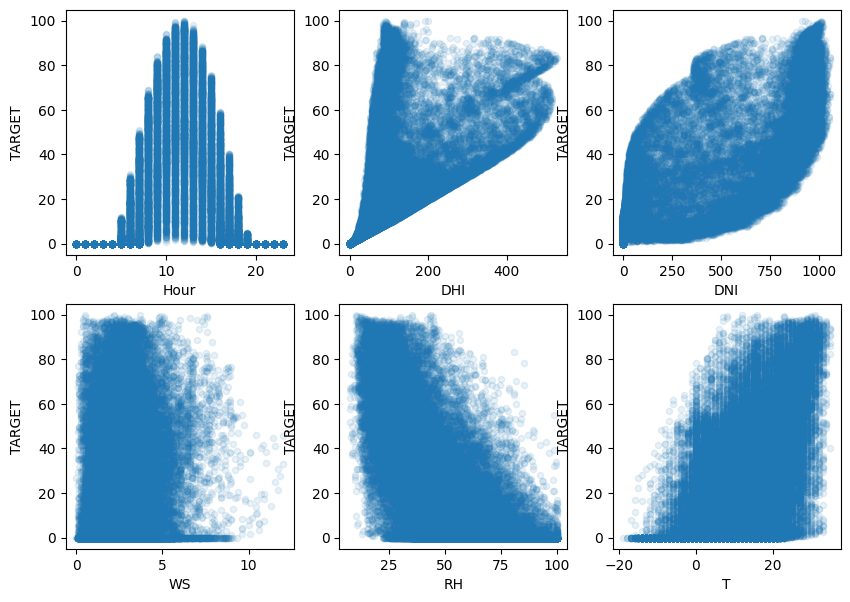

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(10,7))
data.plot(x='Hour', y='TARGET', kind='scatter', alpha=0.1, ax=axes[0,0])
data.plot(x='DHI', y='TARGET', kind='scatter', alpha=0.1, ax=axes[0,1])
data.plot(x='DNI', y='TARGET', kind='scatter', alpha=0.1, ax=axes[0,2])
data.plot(x='WS', y='TARGET', kind='scatter', alpha=0.1, ax=axes[1,0])
data.plot(x='RH', y='TARGET', kind='scatter', alpha=0.1, ax=axes[1,1])
data.plot(x='T', y='TARGET', kind='scatter', alpha=0.1, ax=axes[1,2])
plt.show()

### Day, Minute, 삭제

In [ ]:
data.drop(['Day', 'Minute'], axis=1, inplace=True)
data.head()

,Hour,DHI,DNI,WS,RH,T,TARGET
0,0,0,0,1.5,69.08,-12,0.0
1,0,0,0,1.5,69.06,-12,0.0
2,1,0,0,1.6,71.78,-12,0.0
3,1,0,0,1.6,71.75,-12,0.0
4,2,0,0,1.6,75.20,-12,0.0


In [ ]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(data.drop('TARGET', axis=1), data['TARGET'], test_size = 0.2, random_state=25)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
trainX = scaler.fit_transform(trainX)
testX = scaler.transform(testX)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(trainX, trainY)
pred = model.predict(testX)
score = model.score(testX, testY)
print(score)

0.899531723094055


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100)
model.fit(trainX, trainY)
pred = model.predict(testX)
score = model.score(testX, testY)
print(score)

0.9982777547638892


In [ ]:
answer = pd.read_csv('/content/drive/MyDrive/2023_PASS/data/ex02_test.csv')

In [ ]:
test_data = answer.copy()

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Day     336 non-null    int64  
 1   Hour    336 non-null    int64  
 2   Minute  336 non-null    int64  
 3   DHI     336 non-null    int64  
 4   DNI     336 non-null    int64  
 5   WS      336 non-null    float64
 6   RH      336 non-null    float64
 7   T       336 non-null    float64
 8   TARGET  0 non-null      float64
dtypes: float64(4), int64(5)
memory usage: 23.8 KB


In [ ]:
test_data.drop(['Day', 'Minute', 'TARGET'], axis=1, inplace=True)
test_data.head()

,Hour,DHI,DNI,WS,RH,T
0,0,0,0,2.7,34.42,0.0
1,0,0,0,2.7,34.17,0.1
2,1,0,0,2.7,34.23,0.2
3,1,0,0,2.7,33.99,0.3
4,2,0,0,2.8,33.97,0.4


In [ ]:
test_data = scaler.transform(test_data)

In [ ]:
test_pred = model.predict(test_data)
print(test_pred)

[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.75076396  3.28460713  6.12813188
  8.82477797 15.92778955 19.99090225 23.39249045 26.33027891 30.83073877
 28.2349894  33.3926     30.2068733  23.6831998  17.09807008 13.88837207
 18.84853401 12.616781    6.53797562  1.26212736  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.37537843  1.21995912  2.06452397
  3.65974704  7.32938764 15.73131954 21.3217677  23.22810691 23.88785695
 22.07590378 30.91266367 34.44436713 30.59228383 26.42925661 21.5412031
 16.30045289 11.71488182  5.61259675  1.17110806  0.          0.
  0.          0.          0.          0.   

In [ ]:
answer['TARGET'] = test_pred
answer

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET
0,0,0,0,0,0,2.7,34.42,0.0,0.0
1,0,0,30,0,0,2.7,34.17,0.1,0.0
2,0,1,0,0,0,2.7,34.23,0.2,0.0
3,0,1,30,0,0,2.7,33.99,0.3,0.0
4,0,2,0,0,0,2.8,33.97,0.4,0.0
...,...,...,...,...,...,...,...,...,...
331,6,21,30,0,0,3.6,56.09,-8.0,0.0
332,6,22,0,0,0,3.4,53.54,-8.2,0.0
333,6,22,30,0,0,3.4,53.89,-8.3,0.0
334,6,23,0,0,0,3.4,51.96,-8.4,0.0


In [ ]:
answer.to_csv('이유빈.csv')